In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Orders_n_Customers.csv")
df = pd.DataFrame(data)

print(df.head())
print(df.info())
# print(df.describe())

                event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631880000   
1  2019-11-01 00:00:00 UTC       view     5000088  2053013566100860000   
2  2019-11-01 00:00:01 UTC       view    17302664  2053013553853490000   
3  2019-11-01 00:00:01 UTC       view     3601530  2053013563810770000   
4  2019-11-01 00:00:01 UTC       view     1004775  2053013555631880000   

               category_code   brand   price    user_id  \
0     electronics.smartphone  xiaomi  489.07  520088904   
1  appliances.sewing_machine  janome  293.65  530496790   
2                        NaN   creed   28.31  561587266   
3  appliances.kitchen.washer      lg  712.87  518085591   
4     electronics.smartphone  xiaomi  183.27  558856683   

                           user_session  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
1  8e5f4f83-366c-4f70-860e-ca7417414283  
2  755422e7-9040-477b-9bd2-6a6e8fd97387  
3  3bfb58cd-7892-48cc-8020-2f17e

In [73]:
df['brand'] = df['brand'].fillna('Unknown')
df['category_code'] = df['category_code'].fillna('Unknown')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1048575 non-null  object 
 1   event_type     1048575 non-null  object 
 2   product_id     1048575 non-null  int64  
 3   category_id    1048575 non-null  int64  
 4   category_code  1048575 non-null  object 
 5   brand          1048575 non-null  object 
 6   price          1048575 non-null  float64
 7   user_id        1048575 non-null  int64  
 8   user_session   1048575 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 72.0+ MB
None


In [74]:
event_type_count = df['event_type'].value_counts()
event_type_percent = df['event_type'].value_counts(normalize=True) * 100
event_type_summary = pd.DataFrame({"Count : " : event_type_count, "Percentage:" : event_type_percent.round(2)})
print(event_type_summary, "\n")
print(df['brand'].nunique(), "unique brands")
print(df['category_code'].nunique(), "unique categories")
print(df['user_id'].nunique(), "unique users")

# Most events are views (96%), while purchases form only 1.75% of total events.
# Dataset contains 2669 brands, 124 categories, and 176k unique users.

            Count :   Percentage:
event_type                       
view         1014762        96.78
purchase       18368         1.75
cart           15445         1.47 

2669 unique brands
124 unique categories
176639 unique users


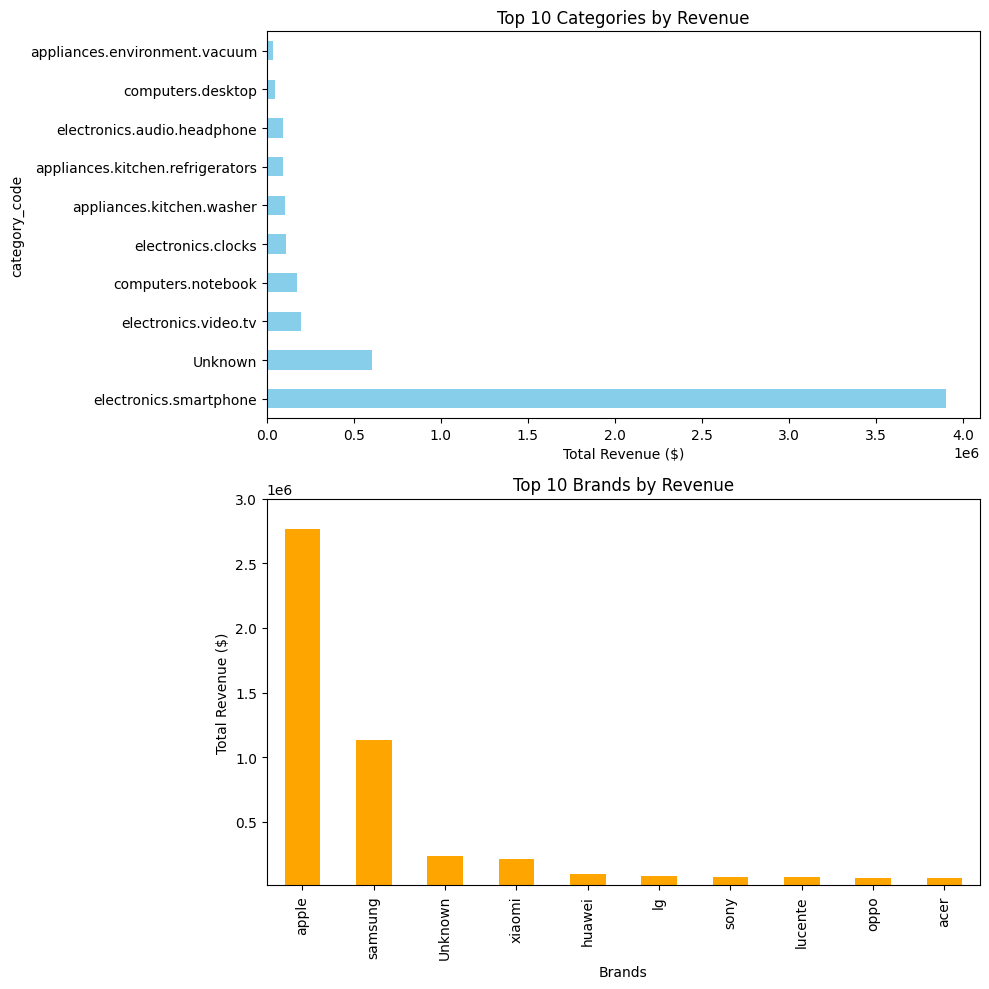

In [75]:
purchases = df[df["event_type"]=="purchase"]
total_revenue = purchases["price"].sum()
avg_price = purchases['price'].mean()

rev_cat = purchases.groupby("category_code")["price"].sum().sort_values(ascending=False).head(10)
rev_brand = purchases.groupby('brand')["price"].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

rev_cat.plot(kind="barh", color="skyblue", ax=ax[0])
ax[0].set_title("Top 10 Categories by Revenue")
ax[0].set_xlabel("Total Revenue ($)")

rev_brand.plot(kind="bar", color="orange", ax=ax[1])
ax[1].set_title("Top 10 Brands by Revenue")
ax[1].set_ylabel("Total Revenue ($)")
ax[1].set_xlabel("Brands")
ax[1].set_ylim(10000, 3000000)

plt.tight_layout()
plt.savefig("Top10.png", dpi=300, bbox_inches="tight")
plt.show()


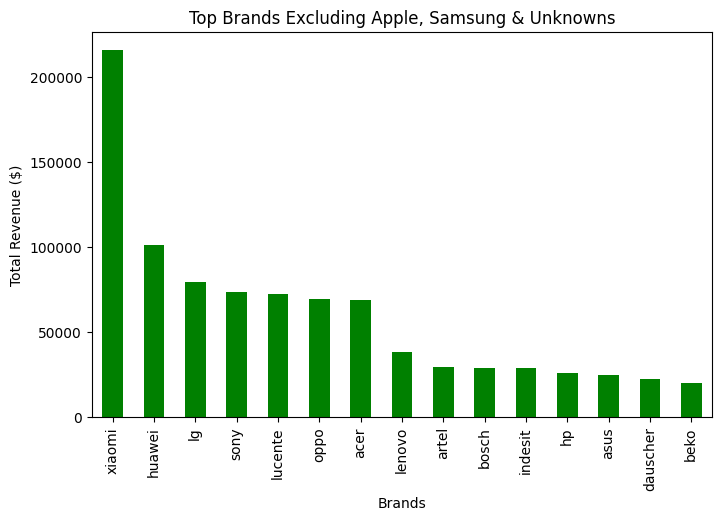

In [76]:
# Excluding Apple
exclude_brands = ["apple", "samsung", "Unknown"] 
filtered = purchases[~purchases["brand"].isin(exclude_brands)]

rev_brand = (
    filtered.groupby("brand")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

rev_brand.plot(kind='bar', figsize=(8,5), color='green')
plt.title('Top Brands Excluding Apple, Samsung & Unknowns')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Brands')
plt.savefig("Other_Brands.png", dpi = 300, bbox_inches = "tight")
plt.show()


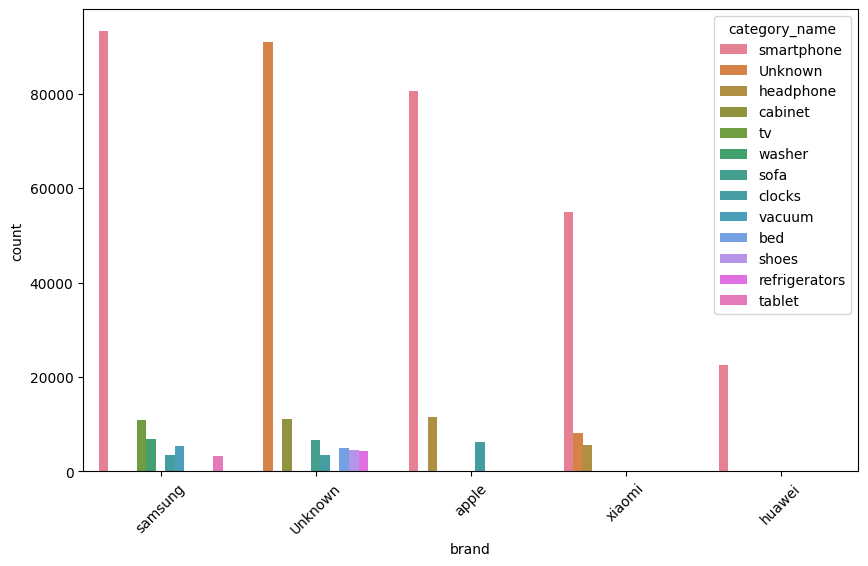

In [77]:
# Brand and their categories unique counts

df["category_name"] = df["category_code"].str.split(".").str[-1]
# print(df["category_name"])

brand_category_count = (
    df.groupby(["brand", "category_name"])
      .size()
      .reset_index(name="count")
      .sort_values(by="count", ascending=False)
)
# print(brand_category_count)

top10_brands = (
    df["brand"].value_counts()
      .head(5)
      .index
)
filtered = brand_category_count[brand_category_count["brand"].isin(top10_brands)]

# print(filtered)

plt.figure(figsize=(10,6))
sns.barplot(data=filtered.head(20), x="brand", y="count", hue="category_name")
plt.xticks(rotation=45)
plt.savefig("Brand_Cat.png", dpi = 300, bbox_inches = "tight")
plt.show()


In [82]:
apple = filtered[filtered["brand"] == "apple"] 
samsung = filtered[filtered["brand"] == "samsung"]
# top_brand=["apple", "samsung"] 
print(apple, "\n", samsung)

# Convert DataFrames to text
output_text = apple.to_string() + "\n\n" + samsung.to_string()

# Save to a text file
with open("apple_samsung_data.txt", "w", encoding="utf-8") as f:
    f.write(output_text)

     brand category_name  count
316  apple    smartphone  80699
312  apple     headphone  11486
310  apple        clocks   6308
315  apple      notebook   2466
317  apple        tablet   1952
308  apple       Unknown    702
311  apple       desktop    261
309  apple           bag    112
313  apple      keyboard     44
314  apple         mouse     17 
         brand    category_name  count
3645  samsung       smartphone  93273
3647  samsung               tv  10791
3649  samsung           washer   6939
3648  samsung           vacuum   5340
3633  samsung           clocks   3517
3646  samsung           tablet   3181
3629  samsung          Unknown   2522
3636  samsung        headphone   2057
3644  samsung    refrigerators   1683
3640  samsung        microwave    791
3641  samsung          monitor    590
3643  samsung          printer    227
3631  samsung  air_conditioner    192
3635  samsung              hdd    191
3637  samsung              hob    163
3642  samsung             oven    157


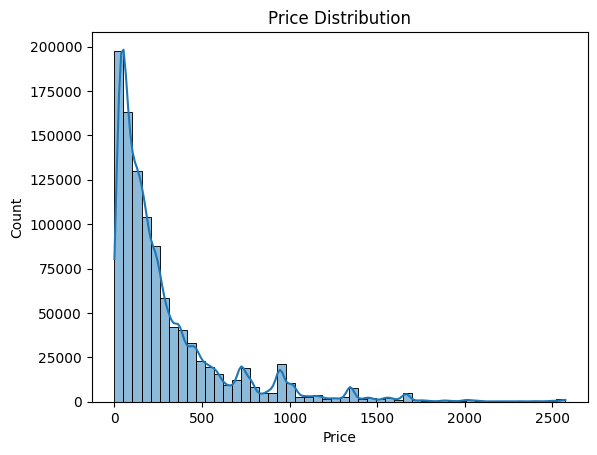

In [79]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.savefig("Price_Distribution.pdf", dpi = 300, bbox_inches = "tight")
plt.show()


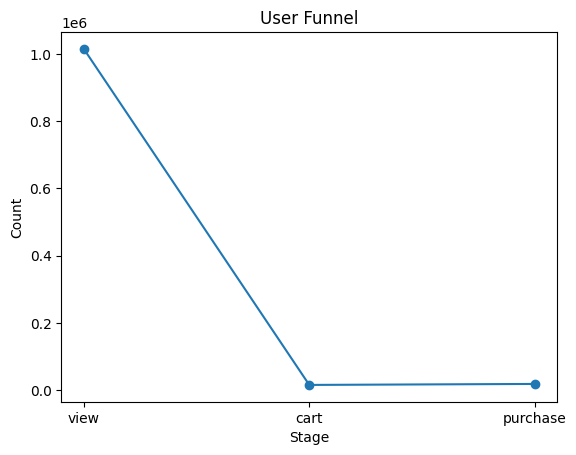

In [80]:
funnel = df['event_type'].value_counts()[['view','cart','purchase']]

plt.plot(funnel.index, funnel.values, marker='o')
plt.title("User Funnel")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.savefig("User_Funnel.png", dpi = 300, bbox_inches = "tight")
plt.show()


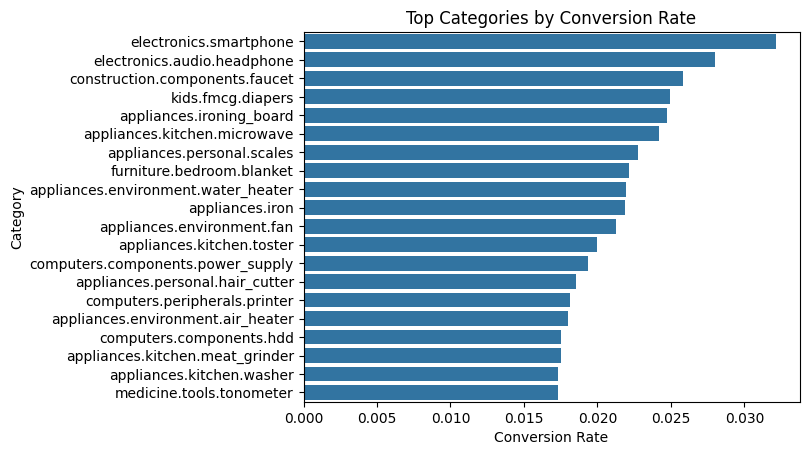

In [81]:
cat_p = df[df['event_type']=='purchase']['category_code'].value_counts()
cat_v = df[df['event_type']=='view']['category_code'].value_counts()

conversion = (cat_p / cat_v).dropna().sort_values(ascending=False).head(20)

sns.barplot(x=conversion.values, y=conversion.index)
plt.title("Top Categories by Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Category")
plt.savefig("TopCat_Conversion.png", dpi = 300, bbox_inches = "tight")
plt.show()
